In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Levering up and Shorting

So far we wrote the portfolio return as simple product of weights and individual asset returns

$$r^p=W R+(1-\sum_i^I w_{i})r^f$$

where $R$ is a a vector of riksy asset returns.

And $W=[w_1,w_2,...w_I]$ is a vector of asset weights

In practice things are not quite as simple.

When $(1-\sum_i^Iw_i)\in[0,1]$ you have a postive fraction of your portfolio in the risk-free asset.

In this case you earn something close to the 3 month t-bill rate.

**Leverage**


When $(1-\sum_i^Iw_i)<0$ you have a negative weight on the risk-free asset.

This means that you are borowing money to invest more in the risky assets, mechanically $\sum_i^Iw_i>1$.

What happens in this case?

* No one will lend you money at the same rate the US gov get to borrow! They get to borrow at the lowest USD rates out there!
* here are the [lending rates of a big retail broker](https://www.interactivebrokers.com/en/index.php?f=46376)
* Here is snapshot from May/2021

![image.png](https://github.com/amoreira2/Fin418/blob/main/assets/plots/leverageandshorting1.jpg?raw=1)

* The structure of the rate is the following

$$r^b=r^{benchmark}+spread$$

* The benchmark is something that is very close to the treasury rate


* Here what your portfolio return looks like

$$r^p=W_tR+\max(1-\sum_i^Iw_i,0)r^f+\min(1-\sum_i^Iw_i,0)r^b$$

* so you earn rf is weight on the rf is positive, but pay rb if the weight is negative. Can rewrite as

$$r^p=W_tR+(1-\sum_i^Iw_i)r^f+\min(1-\sum_i^Iw_i,0)spread$$


* so the spread compensate the broker for the risk it bears when it lends to you instead of lending to the US government

* The broker when it lends to you ask the loan to be backed/collaterized by the assets in your portfolio (just like a house backs a mortgage)

* this mean there will be a limit on your leverage. Typically this takes the following form

   - $\sum_i^Iw_i\leq 1/m_{initial}$ and $\sum_i^Iw_i<1/m_{maintenance}$ with  $1/m_{maintenance}>1/m_{initial}$
   
   - For US retail investors $m_{initial}=0.5$ and $m_{maintenance}$ varies a bit
   
* margin is exactly the inverse of gross leverage. When m=1, your gross leverage is 1/m=1 which means you cannot borrow anything

* in this case for each dollar you have invested you have to put exactyl one dollar in.

* when margin is 0.5, it means that your gross leverage is 1/0.5=2, which means that for each dollar you have you can buy 2 dollars in risky assets

* so the bank lends to you another dollar for each dollar you put it

* here is for a US retial broker. Focus on the top row, 50% initial , 30% maintenance, which translates to 1/0.5=2 initial leverage and 1/0.3=2.33 maintenance leverage  

![image.png](https://github.com/amoreira2/Fin418/blob/main/assets/plots/leverageandshorting2.jpg?raw=1)
   
**Example**

lets say  $m_{initial}=0.5$ and $m_{maintenance}=0.3$. Say you have 100k in your brokerage account and you can buy up to 200K in stocks. The broker lends to you 100k and hold the whole 200k in assets as protection. The value of your networth is still 100k. 200k in stocks -100k in the risk-free asset. For simplicity lets assume the risk-free rate is zero in this example.

  * Say your risk portfolio drops 30%, what is yout networth? risky portfolio 200*(-0.3+1)=140k, minus the 100k, you are now worth 140-100=40
  * This should not be surprising: You must absorb the entire loss
  * What is you risk-asset weight and how much you are borrowing as fraction of your worth?

In [ ]:
(200/100,100/100)

(2.0, 1.0)

In [ ]:
(140/40,100/40)


(3.5, 2.5)

In [ ]:
40/140

0.2857142857142857

  * your leverage went from 2 to 3.5
  * You now have only 40/140=28% on marign
  * you are violating the maintenance constraint, which is 30%. What happens now?
  * your prime broker will ask for cash so you get back to 30%
  * To keep your 140 position you need to have 140\*0.3=42 networth so you need to inject 42-40=2k.



* What happens if you don't inject the cash in time?
* You will simply reduce your position in the risky asset to get back to the limit
* This means that margin have to come down to $0.3\times x=40$ and therefore you have to sell 140-40/0.3=140-133=7k  of your risky asset position

**Fire Sales**

* If you don't do it your broker will certainly sell fro you and  might even liquidiate your entire position
* for example, here is from a retail broker

![image.png](https://github.com/amoreira2/Fin418/blob/main/assets/plots/leverageandshorting3.jpg?raw=1)


* When the position to be sold is large, this can lead to very sharp price movements

* The dealers does not care at all about the price that he sells for as long he can get his money

   - For example, back in March 2021 brokers liquidated a 21 billion dollar portfolio when the family office could not meet the margin call, i.e., the demand for cash. See, [inside-archegoss-epic-meltdown](https://www.wsj.com/articles/inside-archegoss-epic-meltdown-11617323530)
  

**Other leverage constraints**

* In futures market, swap markets, and option markets you can get implicit leverage, often substantially more than in the cash market

* It will vary wildly from market to market and in OTC markets this will depend on the relationship you have with your broker

* For example the Achelegos fund was leveraged 10 to 1, so for each 1 dollar o networth they had 10 dollars of risky assets

* Often this leverage constraint is given by sometype of risk-management at the portfolio level

* For example, it is typical to make the amount of margin  that you have to post depend on your portfolio volatility

$$m\geq \overline{m}+c\sigma(r_p)$$

* This means that if volatilitiy goes up at the same time as your assets go down in value you face demand for cash both from your losses buy also from an increase in the margin you need to sustain your trade




## **Aplication: All in on Tesla**

Jackie is a complete believer on Tesla and decide to invest all her savings, 1 Million dollars on Tesla in early 2017, and lever up to the maximum allowed by it's broker to 2 (inital margin 0.5), so a total position of 2 million dollars that she commited to stick with it.

The broker changed 1% on top of the tbill rate which was at zero.

The broker made clear that a fraction of the tesla shares would have to sold everytime leverage went above 1/0.3, i.e. a maintenance margin of 0.3 . The amount sold would have to bring the account margin back to 0.3.

We will now do a for loop that simulates the dealer margin re-balancing strategy

In [8]:
import pandas_datareader.data as web
import datetime as dt
df= web.DataReader("TSLA", "av-daily", start=dt.datetime(2017, 1, 2),
                      end=dt.datetime(2020, 8, 1),
                     api_key='N78MZQUK4ZCDUABU')
df.index=pd.to_datetime(df.index)


In [9]:
# construct close to close returns from price changes
df['return']=df['close'].pct_change()
df=df[['return']]

df

,return
2017-01-03,NaN
2017-01-04,0.046085
2017-01-05,-0.001057
2017-01-06,0.009967
2017-01-09,0.009912
...,...
2020-07-27,0.086521
2020-07-28,-0.040991
2020-07-29,0.015320
2020-07-30,-0.007751


In [10]:
val=1_000_000 # inital portfolio value

rl=0.01/252 #borrowing spread
m_initial=0.5 # Initial margin
m_maintenance=0.3 # maintenance/minimum margin
pos_RiskyAsset=1/m_initial*val
pos_SafeAsset=val-pos_RiskyAsset

W=pd.DataFrame([],columns=['Risky','Safe']) # containet to store  portfolio overtime
d=df.index[0]
W.at[d,'Risky']=pos_RiskyAsset # position in Tesla at the start
W.at[d,'Safe']=pos_SafeAsset
print(W)


for d in df.index[1:]:
    returnRiskyAsset=float(df.loc[d].values)
    pos_RiskyAsset=pos_RiskyAsset*(1+returnRiskyAsset)
    pos_SafeAsset=pos_SafeAsset*(1+rl)
    networth= pos_RiskyAsset+ pos_SafeAsset
    if np.sum(networth)<0: # sum of w0 gives us the networth. IF that goes negative, trader goes banktrupt and it is liquidated
        W.at[d,'Risky']=pos_RiskyAsset # position in Tesla at the start
        W.at[d,'Safe']=pos_SafeAsset
        break
    if networth/pos_RiskyAsset<m_maintenance: # accoutn is in breach and trader has to rebalance (sell some stock to satisfy their position limits)
        print([pos_RiskyAsset,pos_SafeAsset])
        pos_RiskyAsset=networth*1/m_maintenance
        post_SafeAsset=networth-pos_RiskyAsset
        print([pos_RiskyAsset,pos_SafeAsset])

    W.at[d,'Risky']=pos_RiskyAsset
    W.at[d,'Safe']=pos_SafeAsset
W

                Risky       Safe
2017-01-03  2000000.0 -1000000.0


<ipython-input-10-dd7440011350>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  returnRiskyAsset=float(df.loc[d].values)


,Risky,Safe
2017-01-03,2000000.0,-1000000.0
2017-01-04,2092170.14609,-1000039.68254
2017-01-05,2089958.062584,-1000079.366654
2017-01-06,2110788.5156,-1000119.052343
2017-01-09,2131711.138762,-1000158.739607
...,...,...
2020-07-27,14190515.691967,-1036194.481947
2020-07-28,13608829.899995,-1036235.600776
2020-07-29,13817318.77045,-1036276.721236
2020-07-30,13710217.060694,-1036317.843328


Text(0.5, 1.0, 'volatility')

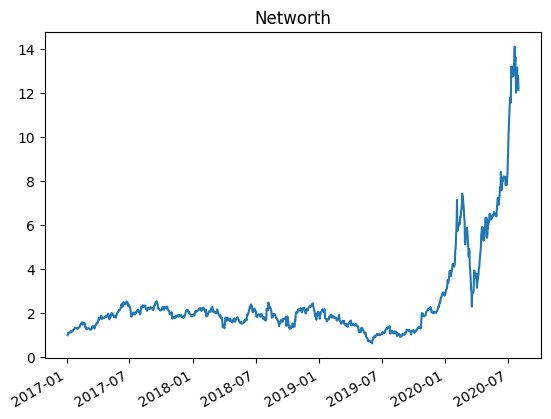

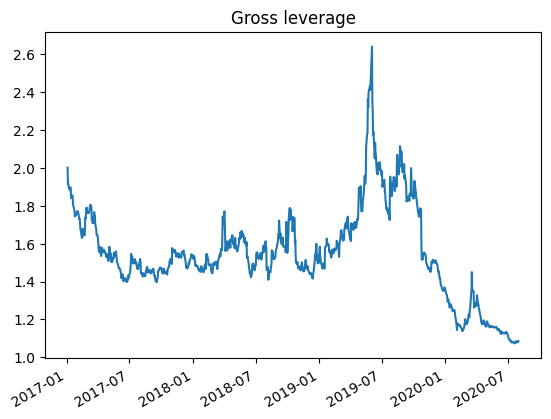

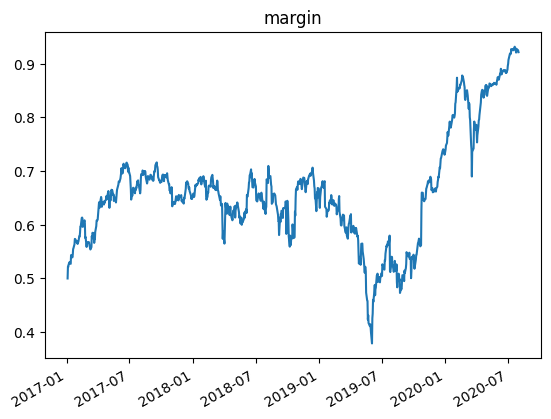

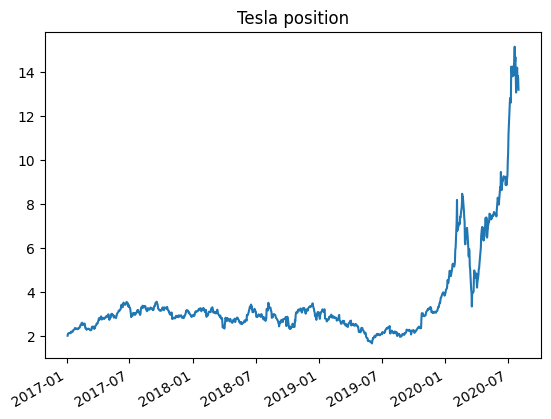

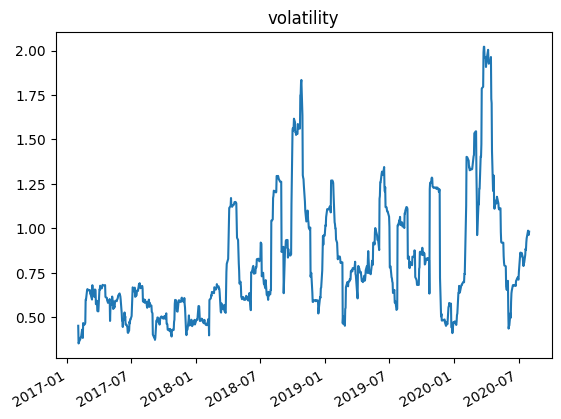

In [11]:
(W.sum(axis=1)/1e6).plot(logy=False)
#(W['2017':'2020']['Asset']/1e6).plot(logy=False)
plt.title('Networth')
plt.figure()
(W['Risky']/W.sum(axis=1)).plot()
plt.title('Gross leverage')
plt.figure()
(W.sum(axis=1)/W['Risky']).plot()
plt.title('margin')
plt.figure()
(W['Risky']/val).plot(logy=False)
plt.title('Tesla position')

plt.figure()
((W.sum(axis=1)).pct_change().rolling(window=21).std()*252**0.5).plot()
plt.title('volatility')

## **Shorting**

Shorting is conceptually very similar to leverage.

You borrow an asset and pay some lending fee to borrow it (perhaps this fee will be zero if there is ample supply).

And of course once you borrow you immediately sell and get the cash from the sale. The broker facilitating this transaction will typically ask you to  keep some margin in you account.

We see in the top line of the margin requirement numbers that the margin requirements for shorting is set to 50% with the maintenance at 30%.

So this says that you need to have 50% of the value of your short position to start the trade, but this can go down to up to 30%.

* This means that if you have 1 million in cash you can short at most 2 million of apple stock

* you actually earn interest on this 3 million, but pay the shorting fee $sf^i$ on the 2 million borrowed stock

* here what your portfolio look like

$$w\times r^i+(1-w)r^f+\min(w,0)sf^i$$

* where inital margin constraint  implies that |w| has to be lower than 2.

* and after the trade is initated is cannot go above 1/0.3

**How does this work for a long-short trade?**

Suppose you want a "market netural trade where you buy 1M worth of different fintech stocks and short 1M worth of banks. How much capital do you need?

* to initiate the long-trade you will need 500k, 50% margin on 1M position

* same thing for the short position, you will need 500 to satisfy the 50% marging

* in the end your portfolio looks like (+1M Fintech,-1M Banks, 1M treasuries)

* your 1 Million dollar still earns the risk-free rate

* for someone that can fund themselves at the risk-free rate-- or have money parked in treasuries anyways, the long-short is "costless" in terms of deployed capital

* they don't need to change any of their allocation to accomodate the long-short trade

* In practice most arbitrageurs have the bare minimum in treasuries and have a much higher cost of funding then treasuries

**Shorting fees**

* In the expression above $sf^i$ is the shorting fee you pay per period to short, which typically is quoted in annualized terms and can change briskly over time.

* Here is a snapshort of the fee to borrow GME stock early this year (the borrowing rate is in red)

![image.png](https://github.com/amoreira2/Fin418/blob/main/assets/plots/leverageandshorting4.jpg?raw=1)



* A full portfolio looks like

$$\sum_i^I w^i\times r^i_t+(1-\sum_i^I w^i)r^f_t+\sum_i^I\min(w^i,0)sf^i_t+\min(1-\sum_i^Iw_i,0)spread_t$$

* Where $\sum_i^I |w^i|\leq 1/m_{initial}$

**Application: Shorting GME**

Now consider a big unconstraiend hedge fund that started shorting GME in March/2020 betting that COVID would drive GME into bankruptcy.

Assumptions about how they  will trade

1. they inject cash as nedded in the trade.

2. We will then track their capital commited to the trade and their dollar "P&L" , i.e the dollars profits/losses of the trade.

3. We will start assuming shorting fee is zero for simplicty

4. We will start with capital of 1 million and inject capital as the bank demands capital, and cash out whenever my leverage goes down below the initial leverage limit

<Axes: >

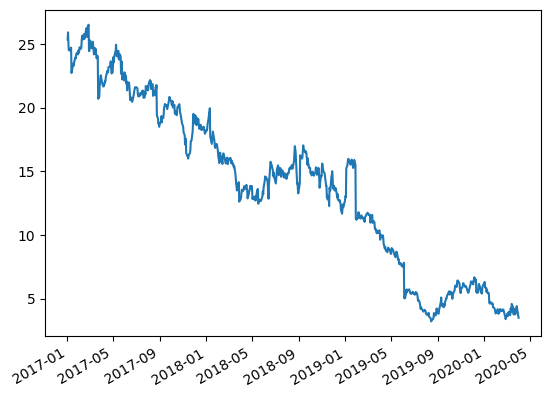

In [12]:
df= web.DataReader("GME", "av-daily", start=dt.datetime(2017, 1, 2),
                      end=dt.datetime(2021, 11, 1),
                     api_key='N78MZQUK4ZCDUABU')
df.index=pd.to_datetime(df.index)
df['return']=df['close'].pct_change()
df=df[['close','return']]

df[:'2020-3'].close.plot()

In [13]:
#Keep returns going forward (starting in april 2020)
df=df.loc['2020-4':,['return']]

In [14]:
df

,return
2020-04-01,-0.071429
2020-04-02,-0.123077
2020-04-03,-0.017544
2020-04-06,0.103571
2020-04-07,0.058252
...,...
2021-10-26,0.022245
2021-10-27,-0.024348
2021-10-28,0.053830
2021-10-29,0.003610


In [17]:
val=1_000_000 # inital capital
m_initial=0.5
m_m_maintenance=0.3
sf=0/252# shorting fee
rf=0/252 # tbill
pos_RiskyAsset=-1/m_initial*val # it is negative becasue you are shorting!
pos_SafeAsset=val-pos_RiskyAsset

W=pd.DataFrame([],columns=['Risky','Safe']) # containet to store  portfolio overtime
d=df.index[0]
W.at[d,'Risky']=pos_RiskyAsset # position in Tesla at the start
W.at[d,'Safe']=pos_SafeAsset
W.at[d,'injectedcapital']=val
print(W)

for d in df.index[1:]:
    pos_SafeAsset=pos_SafeAsset*(1+rf)+pos_RiskyAsset*sf
    returnRiskyAsset=float(df.loc[d].values)
    pos_RiskyAsset=pos_RiskyAsset*(1+returnRiskyAsset)
    networth= pos_RiskyAsset+ pos_SafeAsset
    W.at[d,'injected capital']=0


    if networth/np.abs(pos_RiskyAsset)<m_maintenance: # if you breach the maintanece margim
        neededcapital=(np.abs(pos_RiskyAsset)*m_maintenance-networth)
        W.at[d,'injectedcapital']=neededcapital # how mcuh capital is injected in the trade
        pos_SafeAsset=pos_SafeAsset+neededcapital # change in the risk-free positions

    W.at[d,'Risky']=pos_RiskyAsset # position in Tesla at the start
    W.at[d,'Safe']=pos_SafeAsset
W

                Risky       Safe  injectedcapital
2020-04-01 -2000000.0  3000000.0        1000000.0


<ipython-input-17-df137dfa871a>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  returnRiskyAsset=float(df.loc[d].values)
<ipython-input-17-df137dfa871a>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  returnRiskyAsset=float(df.loc[d].values)


,Risky,Safe,injectedcapital,injected capital
2020-04-01,-2000000.0,3000000.0,1000000.0,NaN
2020-04-02,-1753846.153846,3000000.0,NaN,0.0
2020-04-03,-1723076.923077,3000000.0,NaN,0.0
2020-04-06,-1901538.461538,3000000.0,NaN,0.0
2020-04-07,-2012307.692308,3000000.0,NaN,0.0
...,...,...,...,...
2021-10-26,-109440000.0,278008000.0,NaN,0.0
2021-10-27,-106775384.615385,278008000.0,NaN,0.0
2021-10-28,-112523076.923077,278008000.0,NaN,0.0
2021-10-29,-112929230.769231,278008000.0,NaN,0.0


In [ ]:
3*0.3

0.8999999999999999

Text(0.5, 1.0, 'vol')

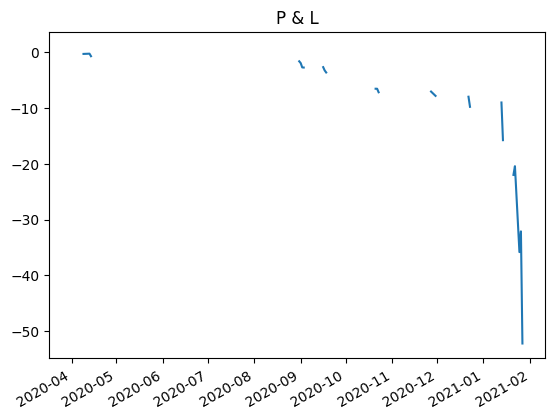

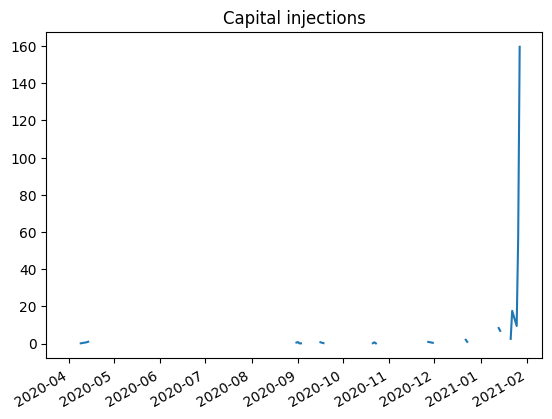

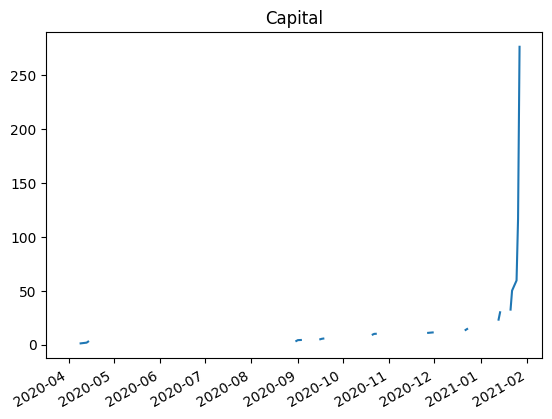

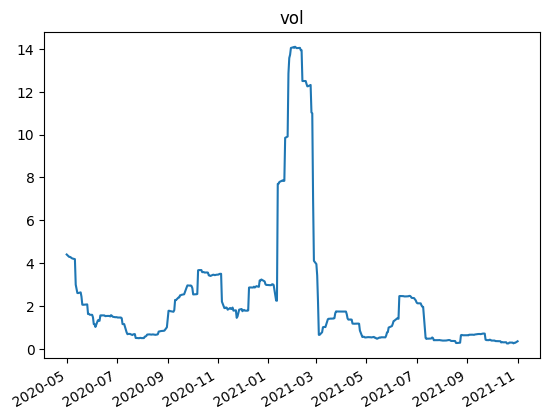

In [19]:
(W.sum(axis=1)/val).subtract((W.injectedcapital/val).cumsum(),axis=0).plot(logy=False)
#(W['2017':'2020']['Asset']/1e6).plot(logy=False)
plt.title('P & L')
plt.figure()
(W.injectedcapital/val).plot(logy=False)
#(W['2017':'2020']['Asset']/1e6).plot(logy=False)
plt.title('Capital injections')

plt.figure()
(W.injectedcapital/val).cumsum().plot(logy=False)
#(W['2017':'2020']['Asset']/1e6).plot(logy=False)
plt.title('Capital')


plt.figure()

((W.sum(axis=1)).pct_change().rolling(window=21).std()*252**0.5).plot()
plt.title('vol')

Suppose you were a hedge fund with 200M capital, you placed a fairly small 1 million dollar trade. You were fully commited and thought you had the capital to support the trade

By late january sustaining the trade required 300 million dollars!

And this does not take into account the fact that margin requirements became much tighter due to the immense volatiltiy of GME stock in the period.

* You can see above that the volatiltiy of the fund net position went to 1,200%!

* As response to this retail brokers increase margin requirements on GME shorts to 300% (from 50%). So to sustain 1 dollar of a short position you need to put 3 dollars instead of 50 cents.

* I am not sure what institutional brokers did, but likely they increased their leverage reuqirements too.

* This implies required capital would increase 6 fold (from 0.5 to 3 initial margin) going from 300 million to 1.8 billion dollars!

* 1.8 Billion dollars to sustain the 1 million dollars trade!



